In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
# Print the summary statistics of the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Distribution of Independent and dependent variables

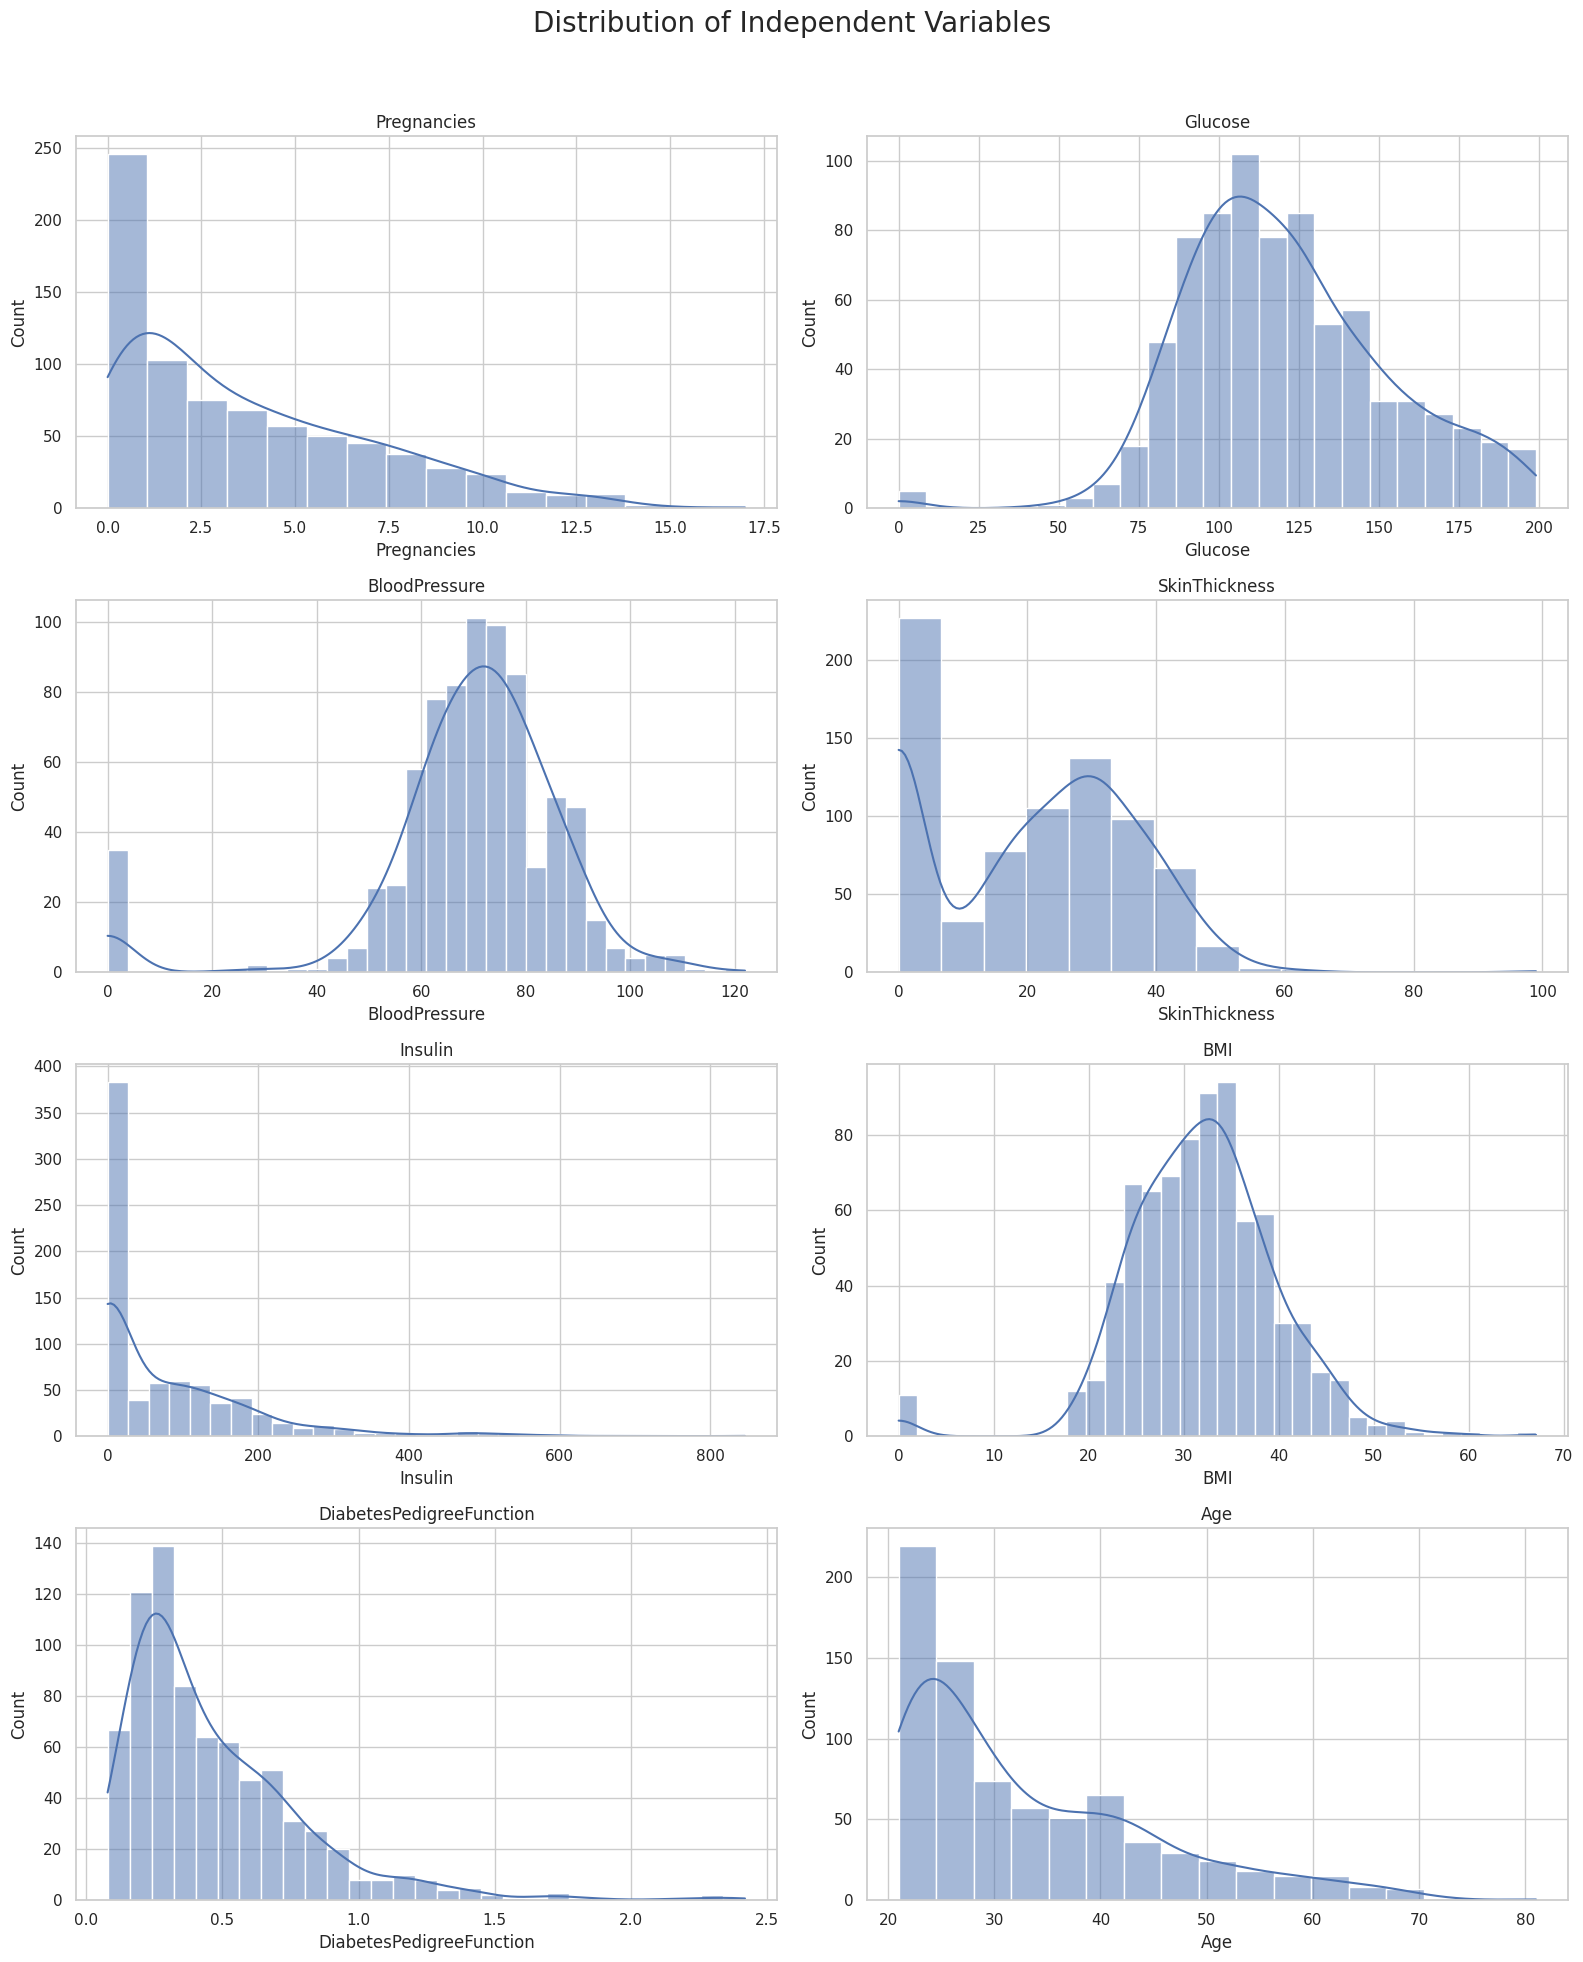

In [18]:
import seaborn as sns
# Set the style for the plots
sns.set(style="whitegrid")

# Plotting independent variables
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Distribution of Independent Variables', fontsize=20)

# Independent variables list
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, ax in enumerate(axes.flatten()):
    sns.histplot(data[columns[i]], kde=True, ax=ax)
    ax.set_title(columns[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



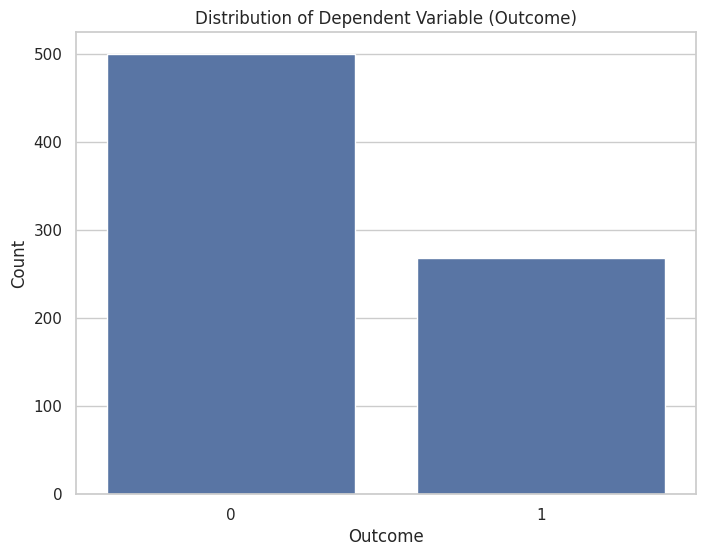

In [19]:
# Plotting the distribution of the dependent variable (Outcome)
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Dependent Variable (Outcome)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

## correlation matrix

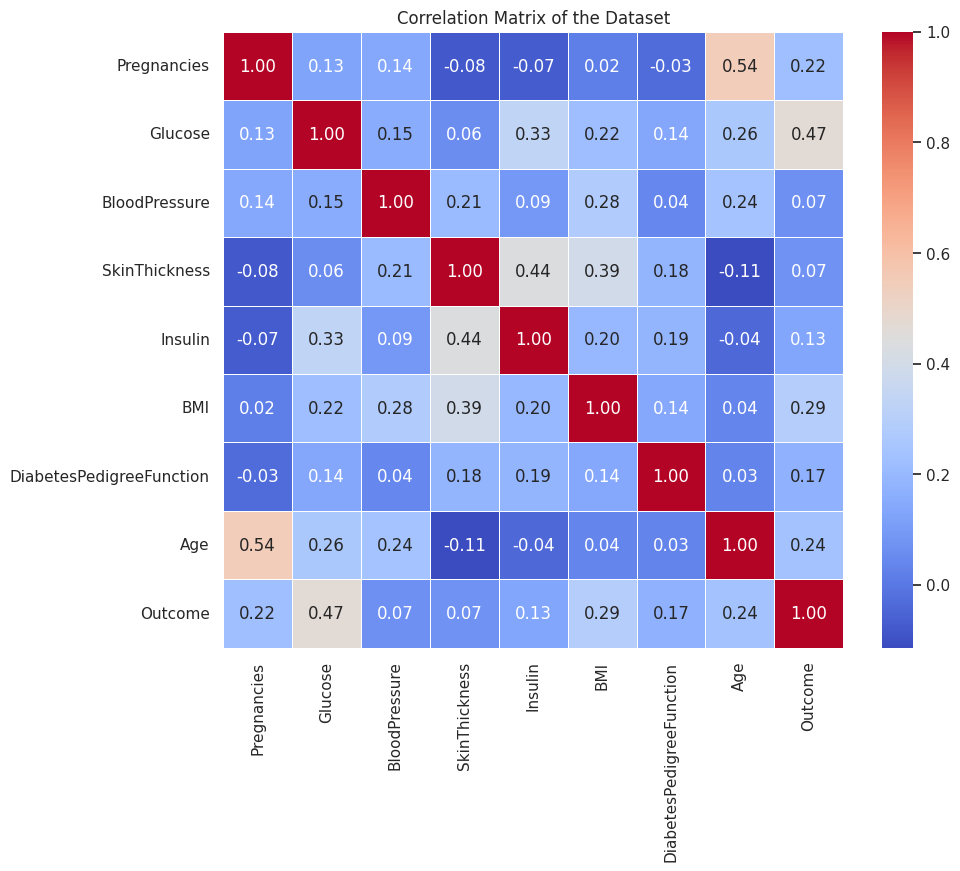

In [20]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the style for the plots
sns.set(style="white")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of the Dataset')
plt.show()

## Pariplot

<Figure size 1200x1000 with 0 Axes>

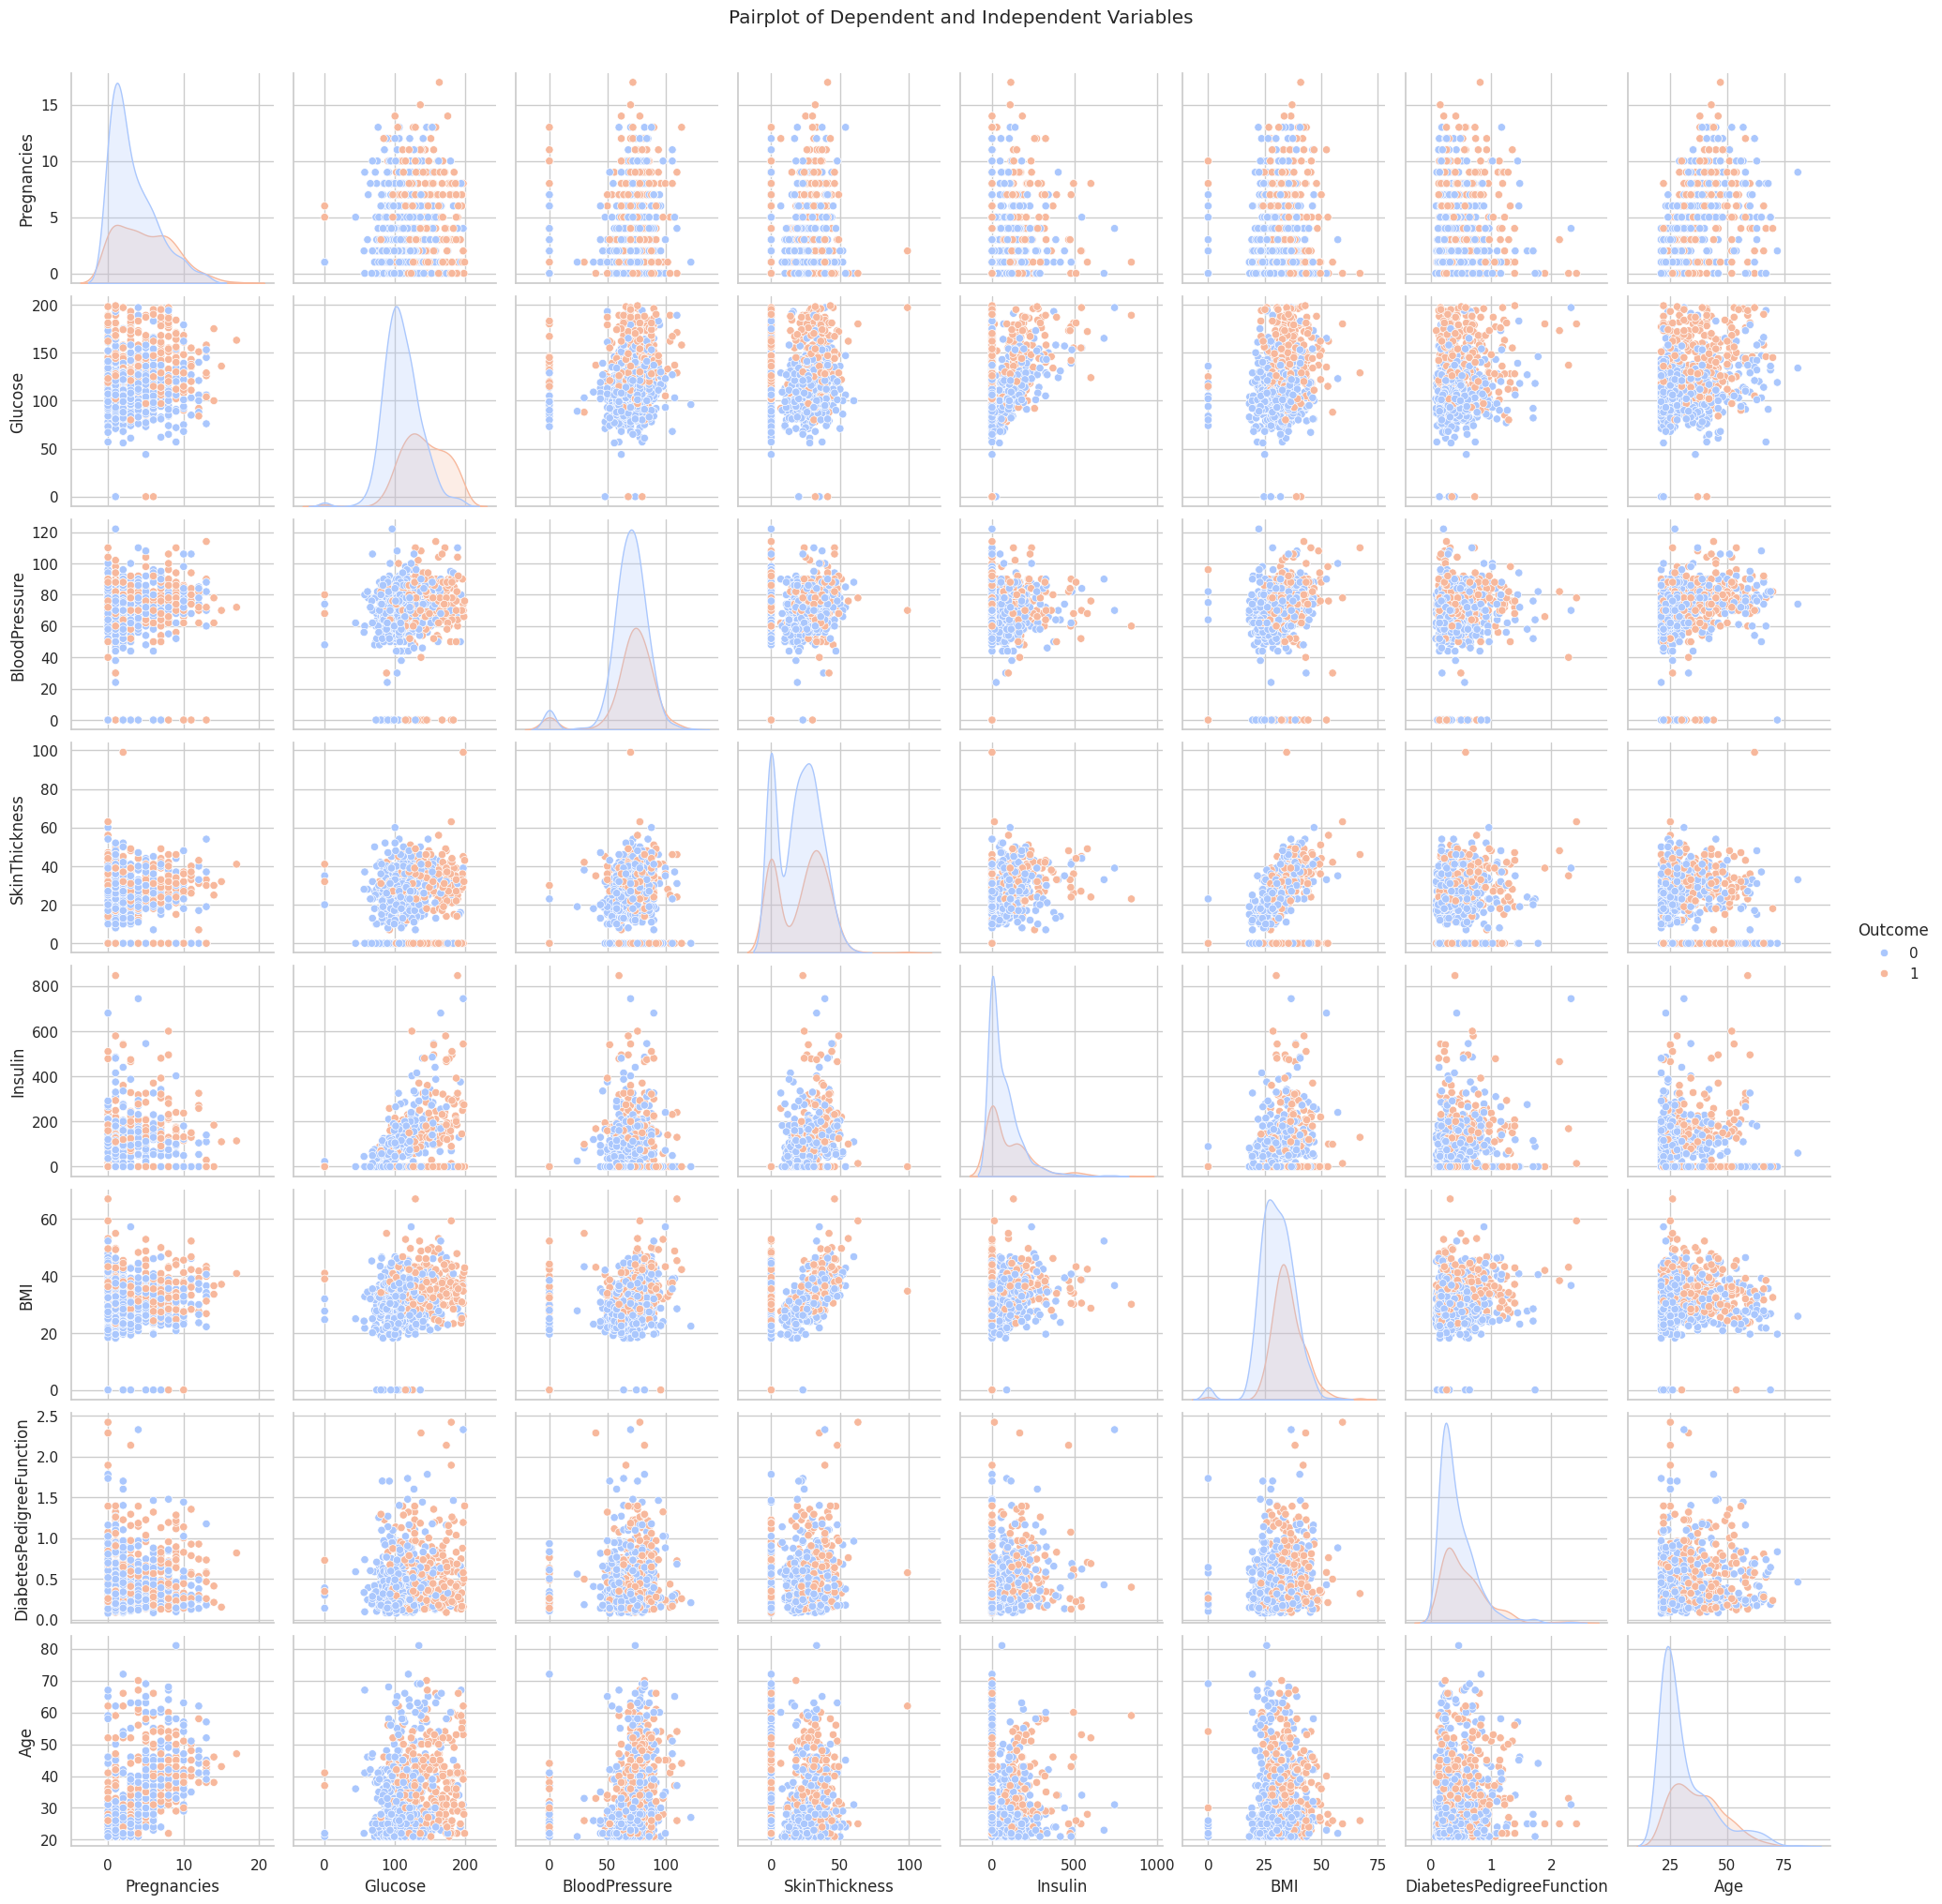

In [21]:
# Ensure all columns are numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
data = data.dropna()

# Set the style for the plots
sns.set(style="whitegrid")

# Plotting pairplot for dependent and independent variables
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(data, hue="Outcome", palette="coolwarm")
pairplot.fig.suptitle('Pairplot of Dependent and Independent Variables', y=1.02)
plt.show()

## Boxplot

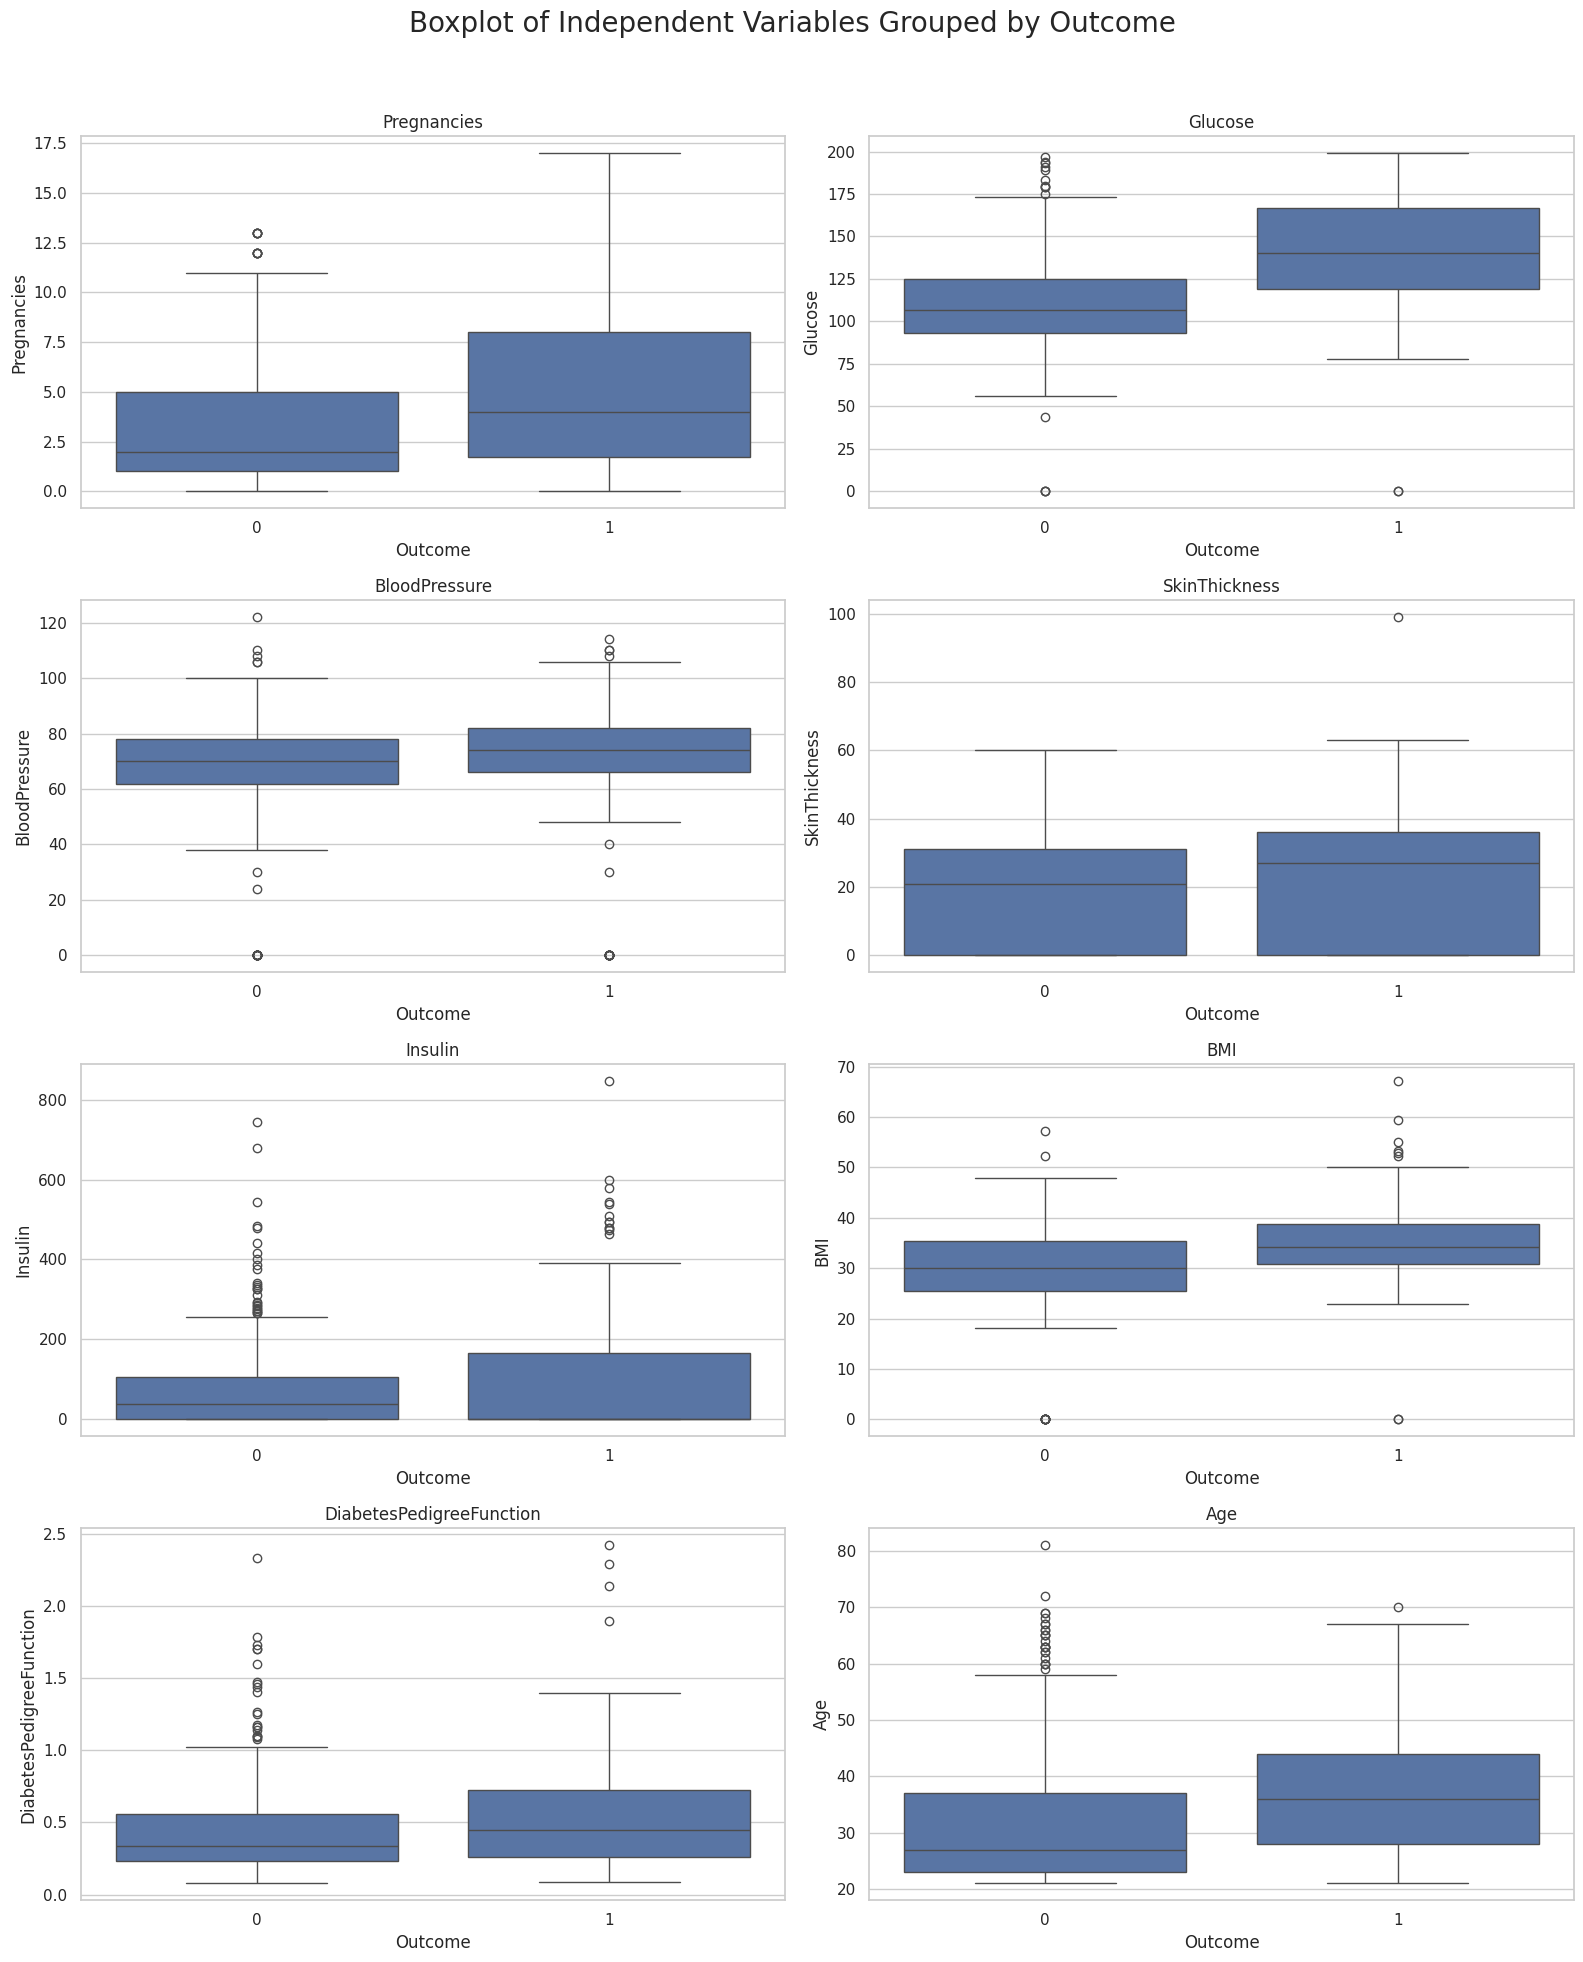

In [22]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plotting boxplots for independent variables grouped by the dependent variable (Outcome)
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Boxplot of Independent Variables Grouped by Outcome', fontsize=20)

# Independent variables list
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x='Outcome', y=columns[i], data=data, ax=ax)
    ax.set_title(columns[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## SCATTER

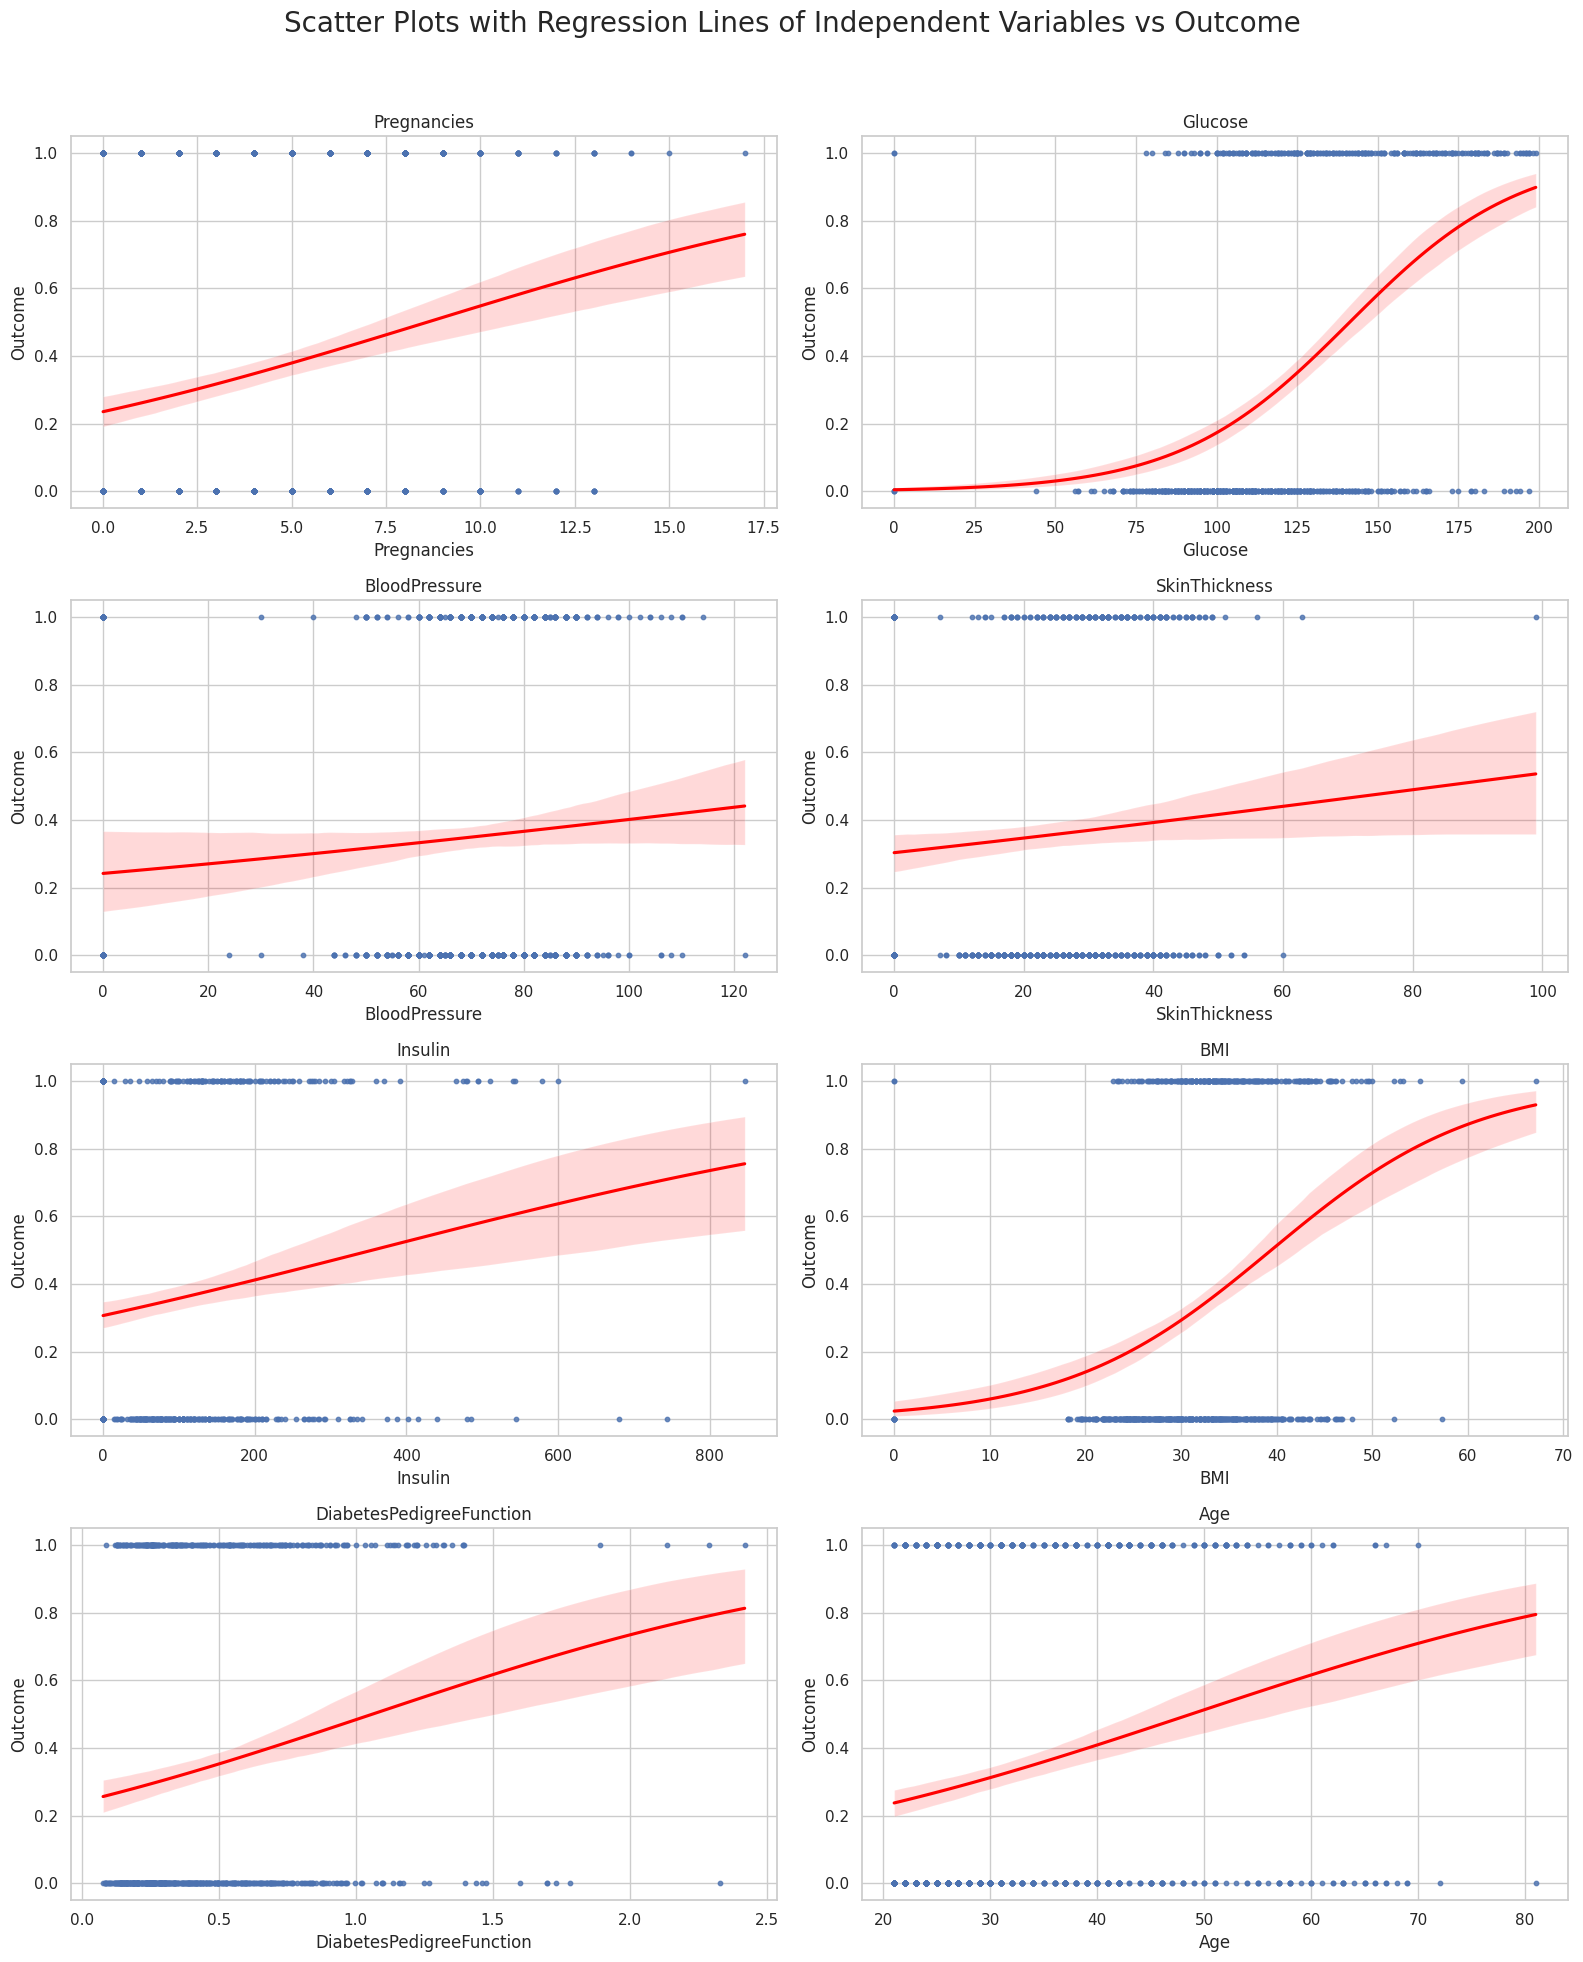

In [23]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plotting scatter plots with regression lines for independent variables against Outcome
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Scatter Plots with Regression Lines of Independent Variables vs Outcome', fontsize=20)

# Independent variables list
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, ax in enumerate(axes.flatten()):
    sns.regplot(x=columns[i], y='Outcome', data=data, logistic=True, ax=ax, scatter_kws={'s': 10}, line_kws={"color": "red"})
    ax.set_title(columns[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## models

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

## spliting

In [25]:
# Split the dataset into features and target variable
X = data.drop(columns='Outcome')
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## LogisticRegression

In [26]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)

print("Logistic Regression")
print("Accuracy:", accuracy_log_reg)
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression
Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [27]:
# Get coefficients
coefficients = log_reg.coef_[0]
feature_names = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Display coefficients and odds ratios
coef_df

,Feature,Coefficient,Odds Ratio
1,Glucose,1.071132,2.918682
5,BMI,0.778152,2.177444
7,Age,0.421002,1.523487
6,DiabetesPedigreeFunction,0.230607,1.259364
0,Pregnancies,0.212558,1.236838
3,SkinThickness,0.045697,1.046757
4,Insulin,-0.200827,0.818054
2,BloodPressure,-0.247842,0.780484


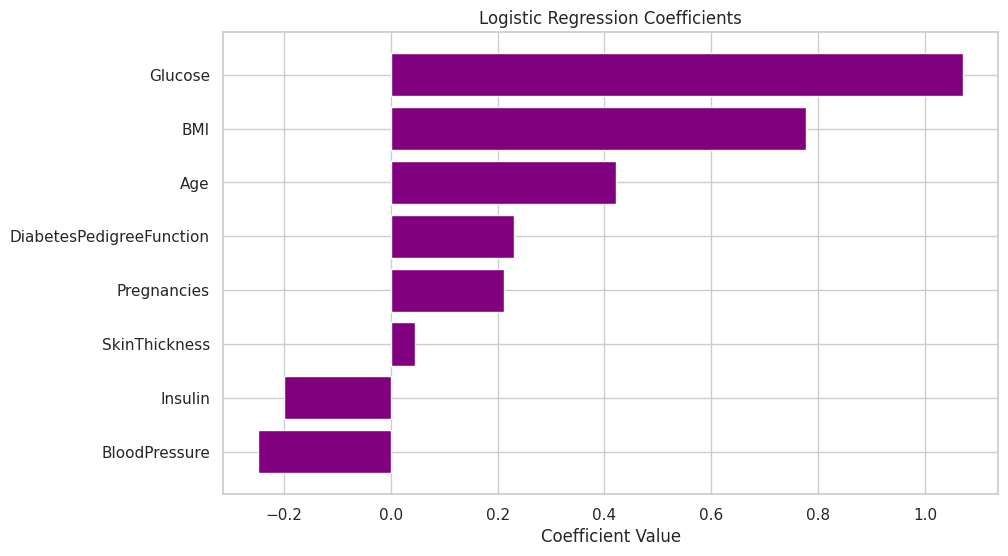

In [28]:
# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='purple')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()



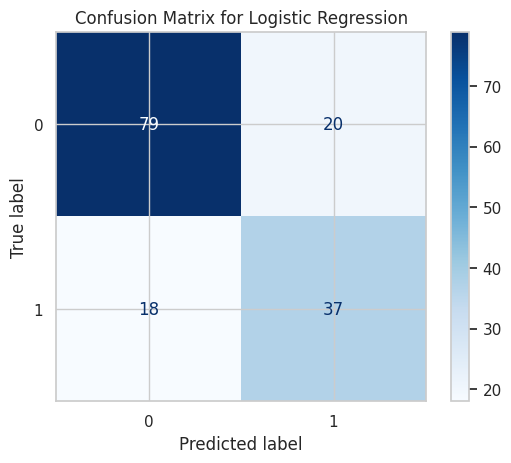

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

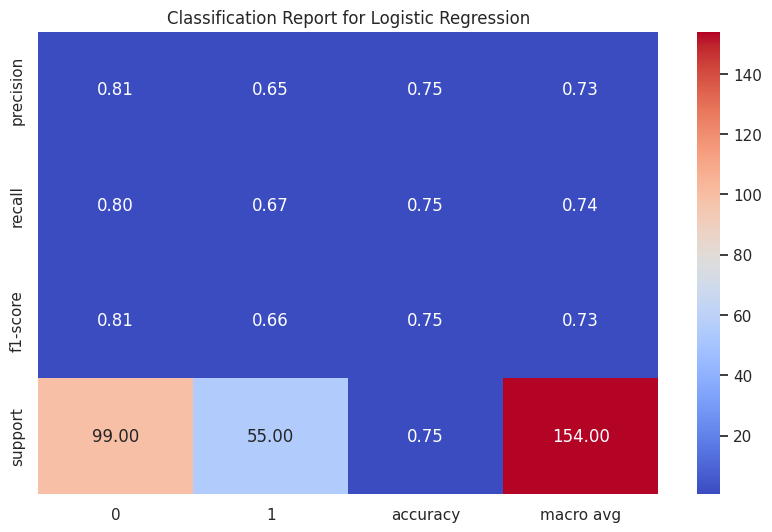

In [30]:
# Convert the classification report to a DataFrame
report_df = pd.DataFrame.from_dict(report_log_reg).transpose()

# Visualize the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report for Logistic Regression')
plt.show()


## DecisionTreeClassifier

In [31]:
# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

# Make predictions
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
report_decision_tree = classification_report(y_test, y_pred_decision_tree, output_dict=True)

print("Decision Tree")
print("Accuracy:", accuracy_decision_tree)
print("Classification Report:\n", classification_report(y_test, y_pred_decision_tree))


Decision Tree
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [32]:
decision_tree

DecisionTreeClassifier()

In [33]:
# Get feature importances for Decision Tree
feature_importances_dt = decision_tree.feature_importances_

# Create a DataFrame for better visualization
fi_df_dt = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_dt})
fi_df_dt = fi_df_dt.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Decision Tree Feature Importances")
fi_df_dt

Decision Tree Feature Importances


,Feature,Importance
1,Glucose,0.333020
5,BMI,0.159318
2,BloodPressure,0.129325
6,DiabetesPedigreeFunction,0.108607
7,Age,0.099387
3,SkinThickness,0.067198
0,Pregnancies,0.066775
4,Insulin,0.036370


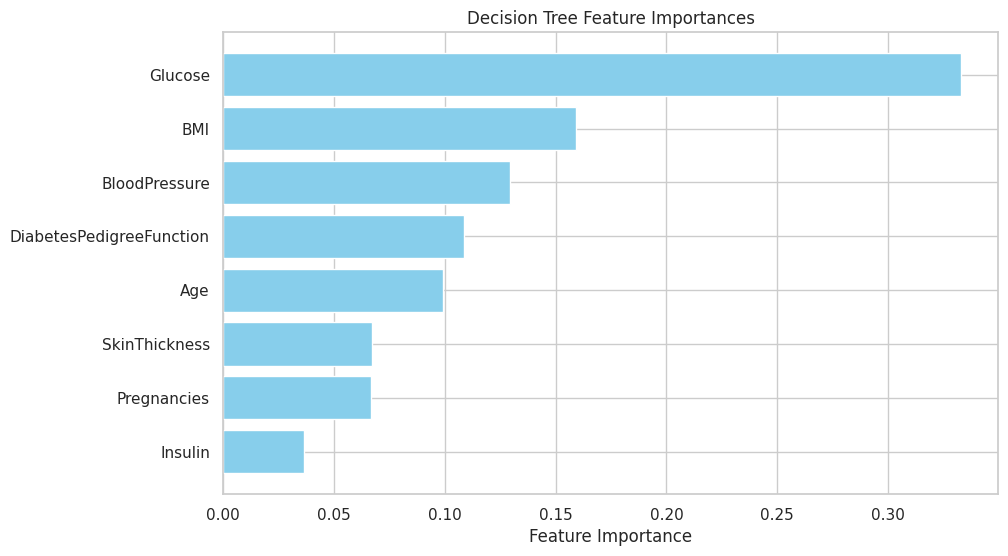

In [34]:
# Plot feature importances for Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(fi_df_dt['Feature'], fi_df_dt['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.gca().invert_yaxis()
plt.show()

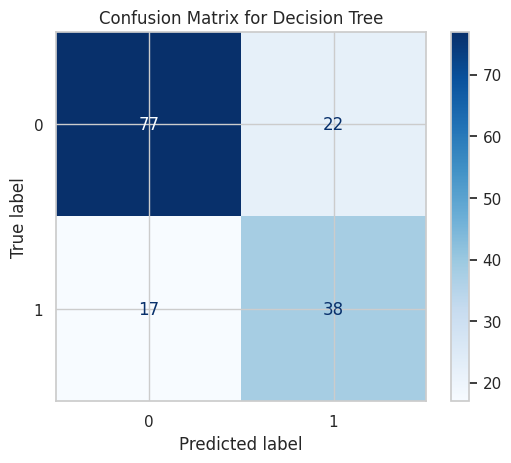

In [35]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_decision_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

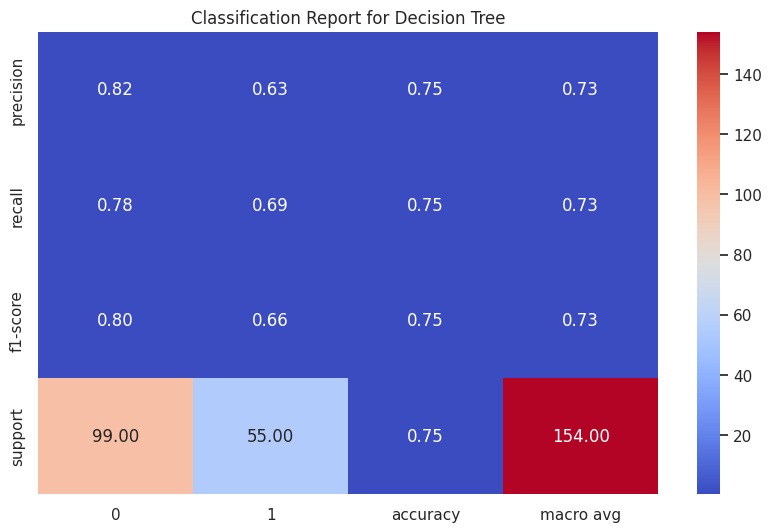

In [36]:
# Convert the classification report to a DataFrame
report_df = pd.DataFrame.from_dict(report_decision_tree).transpose()

# Visualize the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report for Decision Tree')
plt.show()

## RandomForestClassifier

In [37]:
# Initialize and train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)

# Make predictions
y_pred_random_forest = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
report_random_forest = classification_report(y_test, y_pred_random_forest, output_dict=True)

print("Random Forest")
print("Accuracy:", accuracy_random_forest)
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest))


Random Forest
Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [38]:
# Get feature importances for Random Forest
feature_importances_rf = random_forest.feature_importances_

# Create a DataFrame for better visualization
fi_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
fi_df_rf = fi_df_rf.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Random Forest Feature Importances")
fi_df_rf


Random Forest Feature Importances


,Feature,Importance
1,Glucose,0.253682
5,BMI,0.162783
7,Age,0.136178
6,DiabetesPedigreeFunction,0.126419
2,BloodPressure,0.090284
0,Pregnancies,0.085205
3,SkinThickness,0.073272
4,Insulin,0.072177


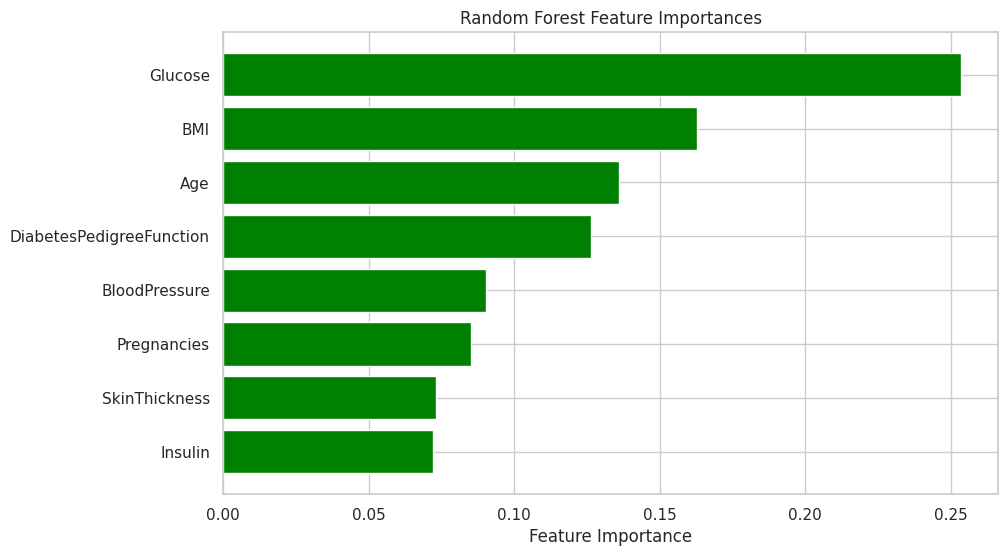

In [39]:
plt.figure(figsize=(10, 6))
plt.barh(fi_df_rf['Feature'], fi_df_rf['Importance'], color='green')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()

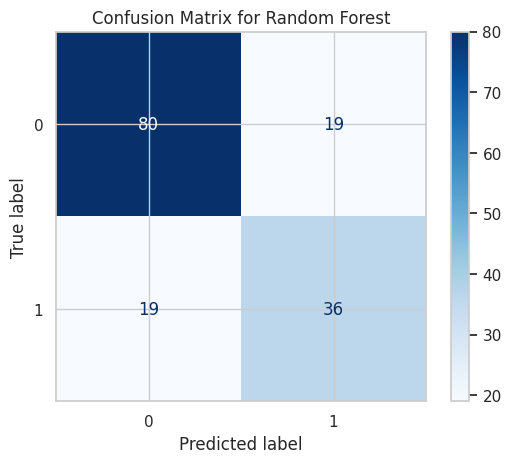

In [40]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_random_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()


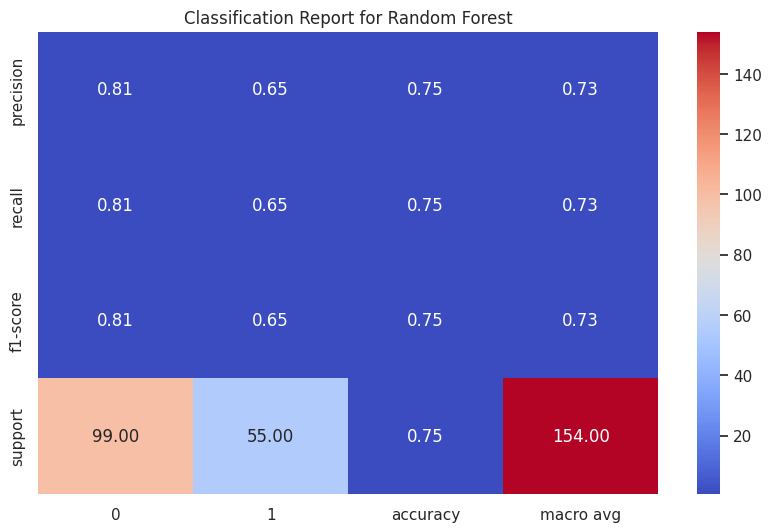

In [41]:
# Convert the classification report to a DataFrame
report_df = pd.DataFrame.from_dict(report_random_forest).transpose()

# Visualize the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report for Random Forest')
plt.show()

## SVC

In [42]:
# Initialize and train the SVM model
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

print("Support Vector Machine")
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))



Support Vector Machine
Accuracy: 0.7337662337662337
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [43]:
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)

# Get coefficients for SVC
coefficients_svc = svc.coef_[0]

# Create a DataFrame for better visualization
coef_df_svc = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_svc})
coef_df_svc = coef_df_svc.sort_values(by='Coefficient', ascending=False)

coef_df_svc



,Feature,Coefficient
1,Glucose,0.891469
5,BMI,0.552647
7,Age,0.288488
0,Pregnancies,0.183419
6,DiabetesPedigreeFunction,0.146234
3,SkinThickness,-0.014300
4,Insulin,-0.147337
2,BloodPressure,-0.223532


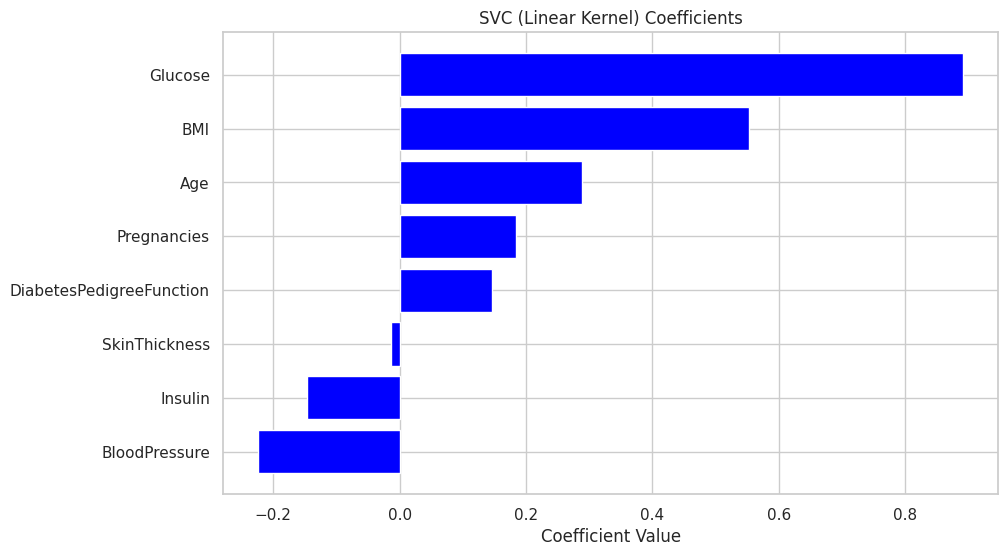

In [44]:
# Plot coefficients for SVC
plt.figure(figsize=(10, 6))
plt.barh(coef_df_svc['Feature'], coef_df_svc['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.title('SVC (Linear Kernel) Coefficients')
plt.gca().invert_yaxis()
plt.show()

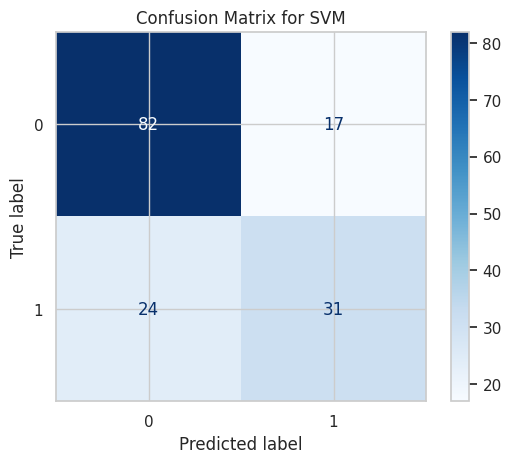

In [45]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.show()


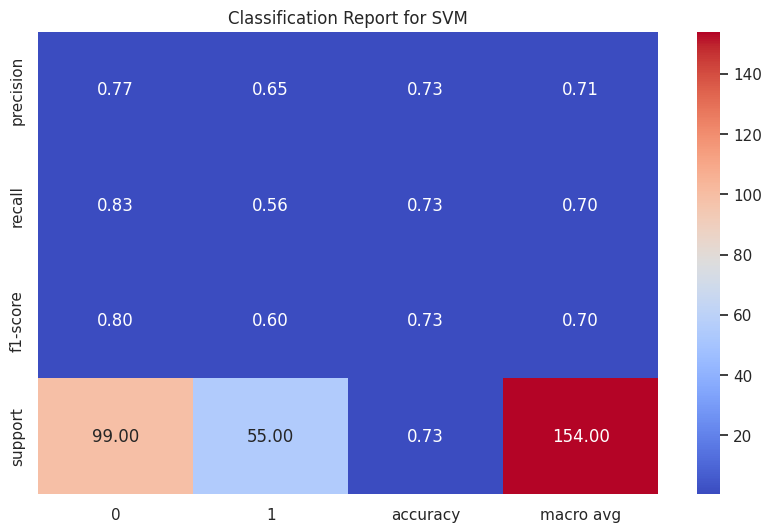

In [46]:
# Convert the classification report to a DataFrame
report_df = pd.DataFrame.from_dict(report_svm).transpose()

# Visualize the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report for SVM')
plt.show()

## KNeighborsClassifier

In [47]:
# Initialize and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

print("K-Nearest Neighbors")
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
Accuracy: 0.6948051948051948
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



In [48]:
from sklearn.inspection import permutation_importance
# Compute permutation feature importance
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Create a DataFrame for better visualization
feature_names = X.columns
perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

perm_importance_df


,Feature,Importance
1,Glucose,0.058009
5,BMI,0.030303
2,BloodPressure,0.008225
6,DiabetesPedigreeFunction,0.001732
0,Pregnancies,0.000216
7,Age,-0.008009
3,SkinThickness,-0.024675
4,Insulin,-0.029437


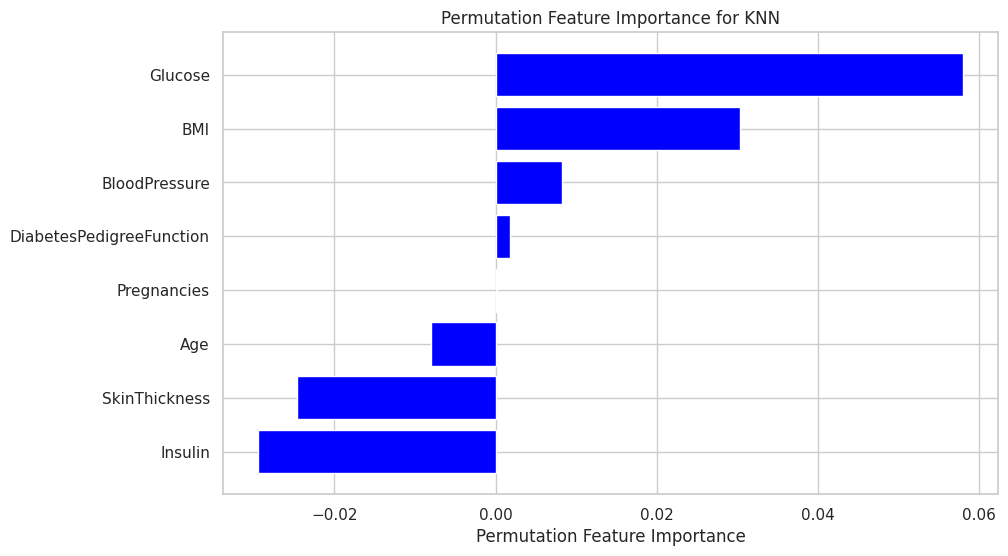

In [49]:
# Plot permutation feature importance
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='blue')
plt.xlabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance for KNN')
plt.gca().invert_yaxis()
plt.show()

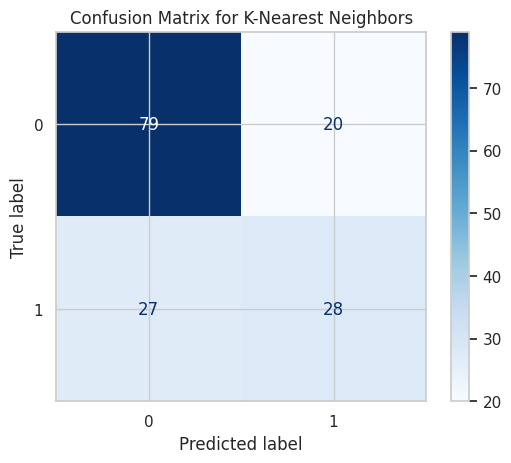

In [50]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()


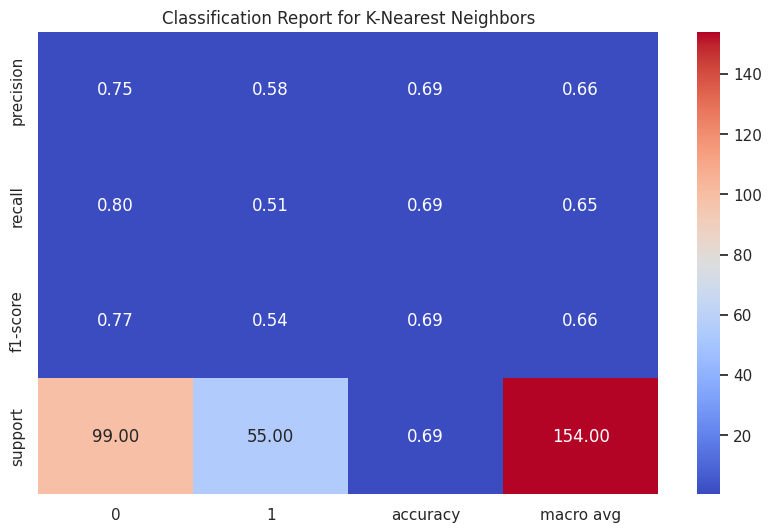

In [51]:
# Convert the classification report to a DataFrame
report_df = pd.DataFrame.from_dict(report_knn).transpose()

# Visualize the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report for K-Nearest Neighbors')
plt.show()

## GradientBoostingClassifier

In [52]:
# Initialize and train the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gradient_boosting = gradient_boosting.predict(X_test_scaled)

# Evaluate the model
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
report_gradient_boosting = classification_report(y_test, y_pred_gradient_boosting, output_dict=True)

print("Gradient Boosting")
print("Accuracy:", accuracy_gradient_boosting)
print("Classification Report:\n", classification_report(y_test, y_pred_gradient_boosting))


Gradient Boosting
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [53]:
# Get feature importances for Gradient Boosting
feature_importances_gb = gradient_boosting.feature_importances_

# Create a DataFrame for better visualization
fi_df_gb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_gb})
fi_df_gb = fi_df_gb.sort_values(by='Importance', ascending=False)


fi_df_gb


,Feature,Importance
1,Glucose,0.389806
5,BMI,0.187824
7,Age,0.156543
6,DiabetesPedigreeFunction,0.112338
4,Insulin,0.053278
2,BloodPressure,0.046601
0,Pregnancies,0.028093
3,SkinThickness,0.025517


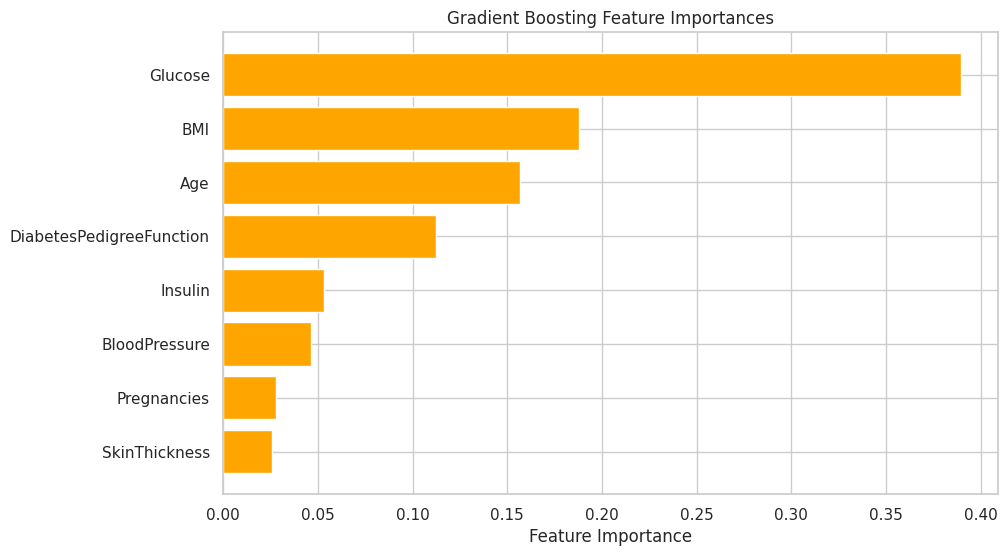

In [54]:
# Plot feature importances for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(fi_df_gb['Feature'], fi_df_gb['Importance'], color='orange')
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Feature Importances')
plt.gca().invert_yaxis()
plt.show()

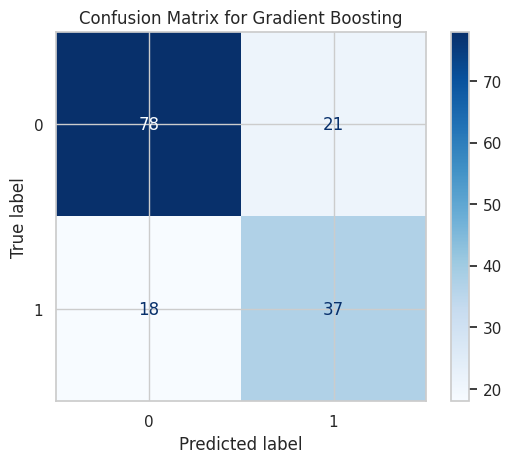

In [55]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gradient_boosting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gradient_boosting.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

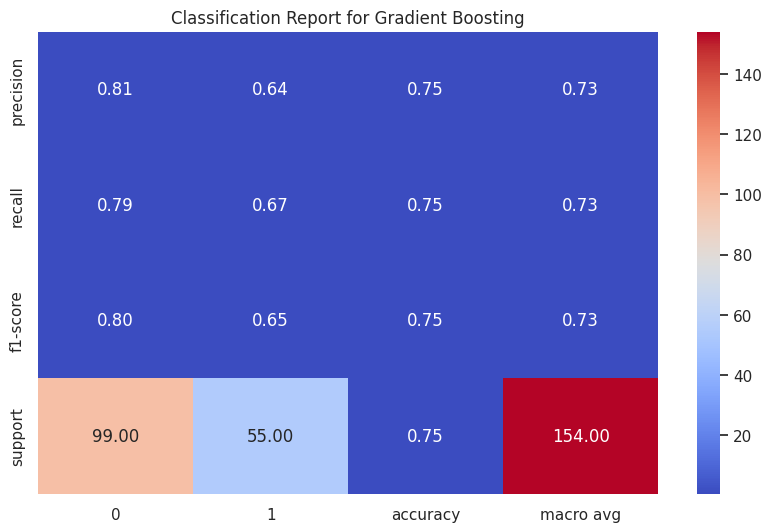

In [56]:
# Convert the classification report to a DataFrame
report_df = pd.DataFrame.from_dict(report_gradient_boosting).transpose()

# Visualize the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report for Gradient Boosting')
plt.show()

## Model comparision

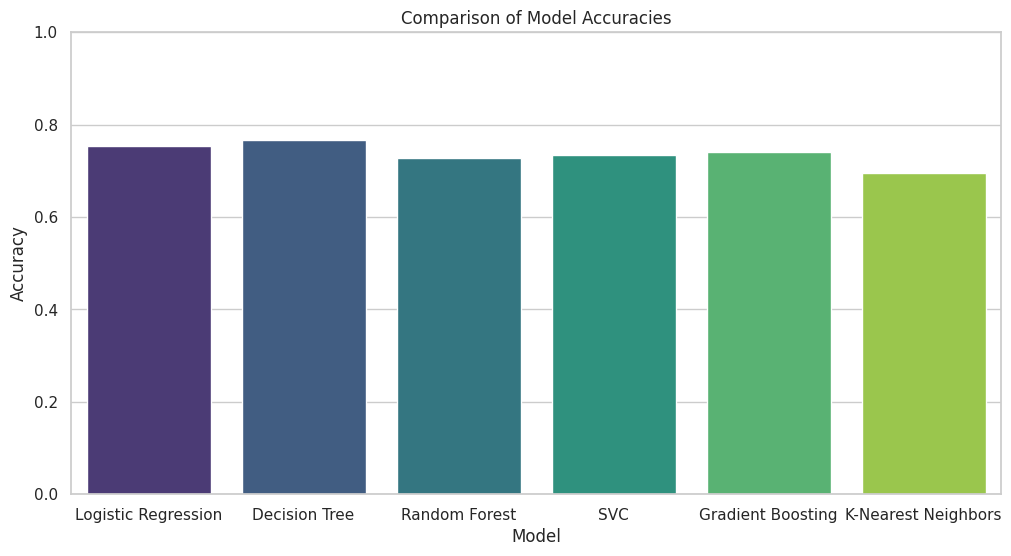

In [74]:

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
accuracies = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy


# Convert the accuracies to a DataFrame for plotting
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Plot the accuracies of all models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df,hue='Model', palette='viridis' )
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

 # Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_df['Accuracy']):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.ylim(0, 1)  # Adjust the y-axis limit to ensure all annotations fit


plt.show()
